In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

In [24]:
# importar todos arquivos csv da pasta Dados COVID para um dataframe
df_COVID = pd.DataFrame()
for file in os.listdir('Dados COVID'):
    if file.endswith('.csv'):
        df_temp = pd.read_csv('Dados COVID/' + file, sep=';')
        df_COVID = pd.concat([df_COVID, df_temp])
df_COVID = df_COVID.reset_index(drop=True)
df_COVID.head()

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
0,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-25,9,210147125.0,0.0,0,0,0,0.0,0.0,NaN
1,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-26,9,210147125.0,1.0,1,0,0,1.0,0.0,NaN
2,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-27,9,210147125.0,1.0,0,0,0,1.0,0.0,NaN
3,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-28,9,210147125.0,1.0,0,0,0,0.0,1.0,NaN
4,Brasil,NaN,NaN,76,NaN,NaN,NaN,2020-02-29,9,210147125.0,2.0,1,0,0,1.0,1.0,NaN


In [37]:
# agrupadas "casosNovos" e "obitosNovos" por data
df_COVID_Acumulado = df_COVID[['regiao', 'data', 'casosNovos', 'obitosNovos']].copy()
df_COVID_Acumulado = df_COVID_Acumulado[df_COVID_Acumulado['regiao'] == 'Brasil']
df_COVID_Acumulado = df_COVID_Acumulado.drop(columns='regiao')
df_COVID_Acumulado = df_COVID_Acumulado.groupby('data').sum().reset_index()
df_COVID_Acumulado.head()

,data,casosNovos,obitosNovos
0,2020-02-25,0,0
1,2020-02-26,1,0
2,2020-02-27,0,0
3,2020-02-28,0,0
4,2020-02-29,1,0


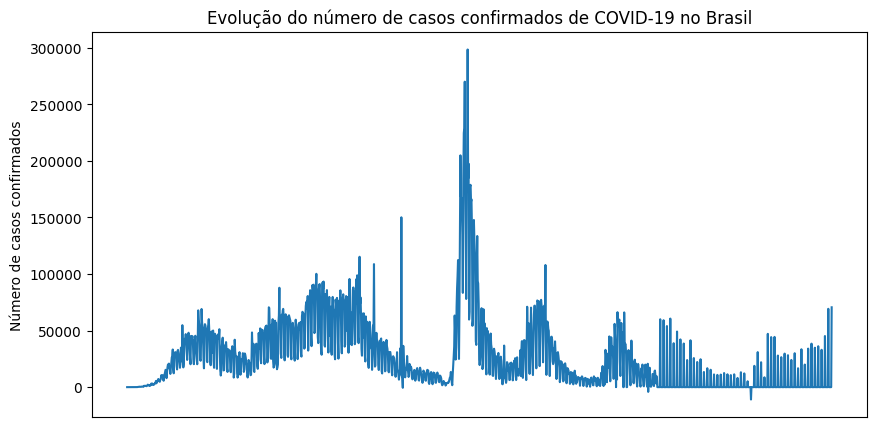

In [38]:
# Construir gráfico de linha com a evolução do número de casos confirmados de COVID-19 no Brasil
plt.figure(figsize=(10, 5))
plt.plot(df_COVID_Acumulado['data'], df_COVID_Acumulado['casosNovos'])
plt.title('Evolução do número de casos confirmados de COVID-19 no Brasil')
plt.ylabel('Número de casos confirmados')
plt.xticks([])
plt.show()

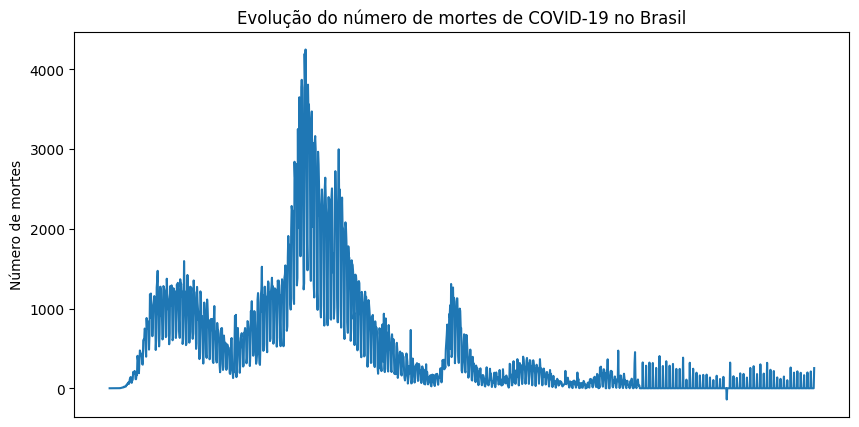

In [39]:
# Construir gráfico de linha com a evolução do número de mortes de COVID-19 no Brasil
plt.figure(figsize=(10, 5))
plt.plot(df_COVID_Acumulado['data'], df_COVID_Acumulado['obitosNovos'])
plt.title('Evolução do número de mortes de COVID-19 no Brasil')
plt.ylabel('Número de mortes')
plt.xticks([])
plt.show()

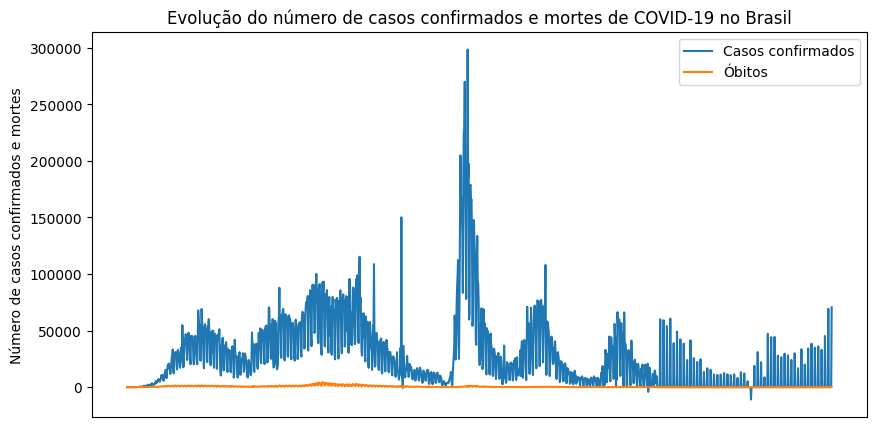

In [40]:
# construir gráfico de linhas com óbitos e casos no mesmo gráfico
plt.figure(figsize=(10, 5))
plt.plot(df_COVID_Acumulado['data'], df_COVID_Acumulado['casosNovos'], label='Casos confirmados')
plt.plot(df_COVID_Acumulado['data'], df_COVID_Acumulado['obitosNovos'], label='Óbitos')
plt.title('Evolução do número de casos confirmados e mortes de COVID-19 no Brasil')
plt.ylabel('Número de casos confirmados e mortes')
plt.xticks([])
plt.legend()
plt.show()

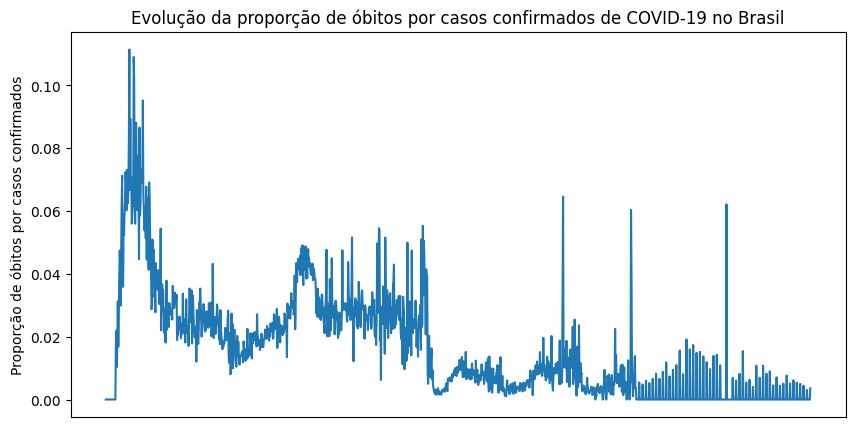

In [44]:
# criar nova coluna com proporção de óbitos por casos
df_COVID_Acumulado['proporcao'] = df_COVID_Acumulado['obitosNovos'] / df_COVID_Acumulado['casosNovos']
df_COVID_Acumulado['proporcao'] = df_COVID_Acumulado['proporcao'].fillna(0)
df_COVID_Acumulado = df_COVID_Acumulado[df_COVID_Acumulado['proporcao'] >= 0]

# construir gráfico de linha com a evolução da proporção de óbitos por casos
plt.figure(figsize=(10, 5))
plt.plot(df_COVID_Acumulado['data'], df_COVID_Acumulado['proporcao'])
plt.title('Evolução da proporção de óbitos por casos confirmados de COVID-19 no Brasil')
plt.ylabel('Proporção de óbitos por casos confirmados')
plt.xticks([])
plt.show()

In [34]:
# criar novo dataframe com obitosNovos e casosNovos agrupados por região e data (ano e mês)
df_COVID_Regiao = df_COVID[['regiao', 'estado', 'municipio', 'data', 'casosNovos', 'obitosNovos']].copy()
df_COVID_Regiao = df_COVID_Regiao[df_COVID_Regiao['estado'].notna()]
df_COVID_Regiao = df_COVID_Regiao[df_COVID_Regiao['municipio'].isna()]
df_COVID_Regiao = df_COVID_Regiao.drop(columns=['estado', 'municipio'])
df_COVID_Regiao['data'] = df_COVID_Regiao['data'].str[:7]
df_COVID_Regiao = df_COVID_Regiao.groupby(['regiao', 'data']).sum().reset_index()
df_COVID_Regiao.head()

,regiao,data,casosNovos,obitosNovos
0,Centro-Oeste,2020-02,0,0
1,Centro-Oeste,2020-03,470,5
2,Centro-Oeste,2020-04,2229,76
3,Centro-Oeste,2020-05,14743,297
4,Centro-Oeste,2020-06,79869,1363


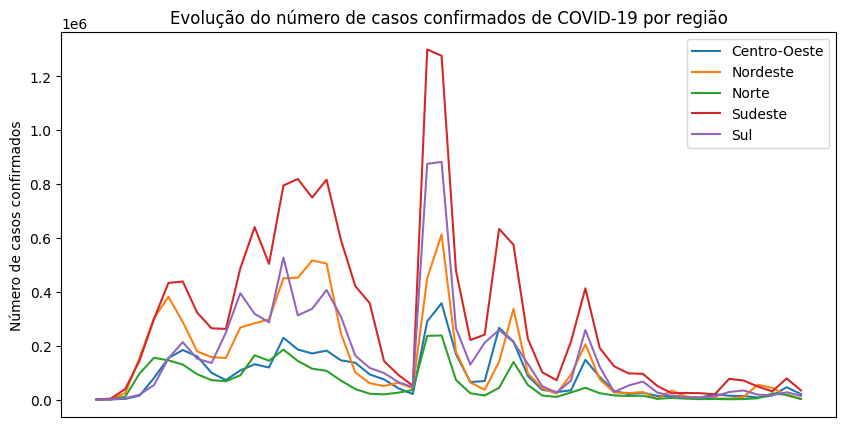

In [35]:
# construir gráfico de linhas para cada região com a evolução do número de casos confirmados de COVID-19
plt.figure(figsize=(10, 5))
for regiao in df_COVID_Regiao['regiao'].unique():
    df_temp = df_COVID_Regiao[df_COVID_Regiao['regiao'] == regiao]
    plt.plot(df_temp['data'], df_temp['casosNovos'], label=regiao)
plt.title('Evolução do número de casos confirmados de COVID-19 por região')
plt.ylabel('Número de casos confirmados')
plt.xticks([])
plt.legend()
plt.show()

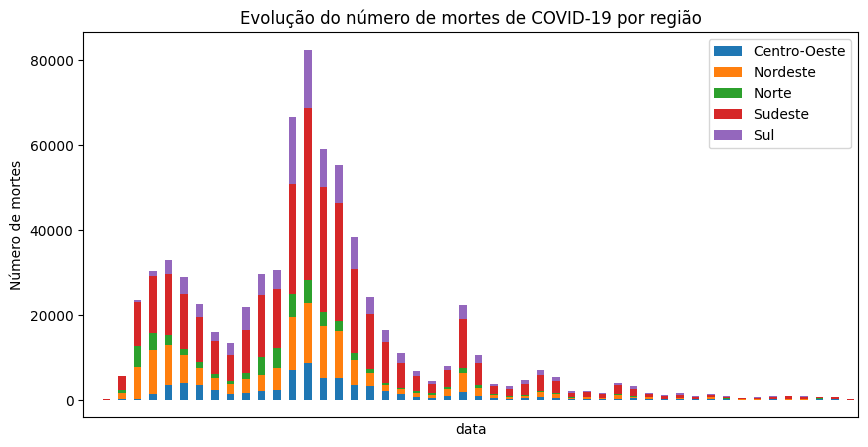

In [53]:
# construir gráfico de barras por ano-mês com a evolução do número de mortes e legendado por região 
df_COVID_Regiao.pivot(index='data', columns='regiao', values='obitosNovos').plot(kind='bar', stacked=True, figsize=(10, 5))

plt.title('Evolução do número de mortes de COVID-19 por região')
plt.ylabel('Número de mortes')
plt.xticks([])
plt.legend()
plt.show()